# Project 1
#### Ashish Yonzon, Brenden Latham
#### CPSMA-4413 Numerical Analysis
#### Dr. Jacob

In [ ]:
import pandas as pd
import math

First we will create a couple functions. The first will be for finding true error and relative true error, while the second will be for approximate error and relative approximate error.

In [68]:
def errors(true_value,predicted_value):
  true_error = true_value - predicted_value
  relative_error = true_error / true_value
  return(true_error,relative_error)
  # print(f"True error:{true_error} & Relative Error {relative_error}")

In [69]:
def apx_errors(current_value,previous_value):
  apx_error = current_value - previous_value
  apx_relative_error = apx_error / current_value
  return(apx_error,apx_relative_error)
  # print(f"Approximate error:{apx_true_error} & Approximate Relative Error:{apx_relative_error}")

The output of the functions are as follows.

In [73]:
errors(20,21)

(-1, -0.05)

where 20 is the true value and 21 is the estimated value

In [74]:
apx_errors(21,20)

(1, 0.047619047619047616)

Where 21 is the current approximation and 20 is the previous approximation

We will now explore the Taylor Series for e^x centered at 1

First we define a function for the Taylor series.

In [ ]:
def taylor_exp(x,a,degree):
    return sum([(x-a)**n/math.factorial(n) for n in range(degree)])*math.exp(1)


Since we are centering at 1, we will set a=1. Also because e^x is equal to it's derivative, we will just need to multiply the output by e^1.

Lets see what this gives us when we have x=1.1 for e^x

In [ ]:

# Create a list of degrees
degrees = range(21)
f = math.exp
x = 1.1
a = 1


# Create a dictionary of values
data = {'Degree': degrees,
        'Actual Value': math.exp(x),
        'Approximation': [taylor_exp(x,a, n) for n in degrees],

        'True Error': [f(x) - taylor_exp(x,a, n) for n in degrees],
        'Relative Error': [(f(x) - taylor_exp(x,a, n))/f(x) for n in degrees]}
pd.options.display.float_format = '{:.15f}'.format
# Create a DataFrame
df = pd.DataFrame(data)

# Set the Degree column as the index
df.set_index('Degree', inplace=True)

# Print the DataFrame
df


,Actual Value,Approximation,True Error,Relative Error
Degree,,,,
0,3.004166023946433,0.000000000000000,3.004166023946433,1.000000000000000
1,3.004166023946433,2.718281828459045,0.285884195487388,0.095162581964041
2,3.004166023946433,2.990110011304950,0.014056012641483,0.004678840160445
3,3.004166023946433,3.003701420447245,0.000464603499188,0.000154653070265
4,3.004166023946433,3.004154467418655,0.000011556527778,0.000003846833925
5,3.004166023946433,3.004165793592940,0.000000230353493,0.000000076678017
6,3.004166023946433,3.004166020116426,0.000000003830007,0.000000001274899
7,3.004166023946433,3.004166023891817,0.000000000054616,0.000000000018180
8,3.004166023946433,3.004166023945751,0.000000000000682,0.000000000000227


In [ ]:

taylor_exp(10,1, 5),taylor_exp(10,1, 20),f(10)

(1210.6547693499472, 22003.206867097284, 22026.465794806718)

We can see that when using up to the 20th degree, we get extremely close to the real value. Now let's visualize the difference between the real function and our Taylor Expansion when stopping at the 5th degree.

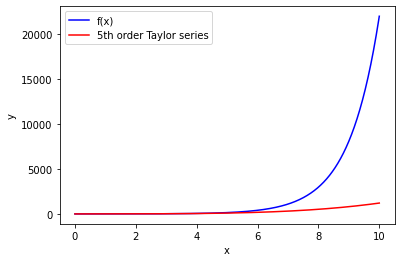

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.exp(x)


x = np.linspace(0, 10, 1000)
y = f(x)
y_taylor = taylor_exp(x,1, 5)

plt.plot(x, y, label='f(x)',color='blue')
plt.plot(x, y_taylor, label='5th order Taylor series',color='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


That's not very close is it. This is why it is important to use a sufficient number of degrees in your Taylor Expansions.

Next We will be looking at a common format for comparing approximations. We will examine the formula for euclidean distance from (0,0)

In [54]:
def true_euclid(x,y):
  return(math.sqrt((x**2)+(y**2)))

def small_brain_euclid(x,y):
  return(x+y)

def big_brain_euclid(x,y):
  return((.96*x)+(.4*y))

In [57]:
my_x_range = range(2,6,1)
my_y_range = my_x_range
for i in my_x_range:
  for j in my_y_range:
    print("true value:",
    true_euclid(i,j),
    " small brain value:",
    small_brain_euclid(i,j),
    " big brain value:",
    big_brain_euclid(i,j)
    )

true value: 2.8284271247461903  small brain value: 4  big brain value: 2.7199999999999998
true value: 3.605551275463989  small brain value: 5  big brain value: 3.12
true value: 4.47213595499958  small brain value: 6  big brain value: 3.52
true value: 5.385164807134504  small brain value: 7  big brain value: 3.92
true value: 3.605551275463989  small brain value: 5  big brain value: 3.6799999999999997
true value: 4.242640687119285  small brain value: 6  big brain value: 4.08
true value: 5.0  small brain value: 7  big brain value: 4.48
true value: 5.830951894845301  small brain value: 8  big brain value: 4.88
true value: 4.47213595499958  small brain value: 6  big brain value: 4.64
true value: 5.0  small brain value: 7  big brain value: 5.04
true value: 5.656854249492381  small brain value: 8  big brain value: 5.4399999999999995
true value: 6.4031242374328485  small brain value: 9  big brain value: 5.84
true value: 5.385164807134504  small brain value: 7  big brain value: 5.6
true value: 

These approximations are not great, however I would assume that the more comples ones would match their braininess. Approximations of these two types can be used when wanting to avoid using a square root, however I am not sure what the other to types would be used for, as they just add more square roots and logs. I do agree with the braininess to an extent.

We now have some great tools for approximating functions with Taylor Expansions. We have seen why it is necessary to use an N that is sufficient for the approximation. Overdoing it won't help either, because we have also seen that after a certain point the law of diminishing returns kicks in. We really have to choose N wisely. One way we can do this is by considering that while x increases, we might have to choose higher and higher values for N. Our graph shows a great representation of this. For N=5, once x reaches around 6, we can't really take the result of our Taylor Polynomial as a good approximation anymore.